Steps:
- Activate the GPU
- clone the repo
- upload your .mp4 video and rename it to face.mp4
- run the cells 


In [1]:
!git clone https://github.com/zllrunning/face-parsing.PyTorch.git

Cloning into 'face-parsing.PyTorch'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


Extract the frames

In [2]:
import cv2
import numpy as np
import pandas as pd 
import os
from google.colab.patches import cv2_imshow

In [3]:
# define the color

# I made this file after watching this video
# https://www.youtube.com/watch?v=yKZ_A0XzXMU

def length_of_video(video_path):
  # smaller helper function
  cap = cv2.VideoCapture(video_path)
  length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  return length

def extracting_frames(video_path, save_path,skip_frames):
  # extract frames and save them as jpg
  # video_path: path to video
  # save_path : save_directory for extracted images
  # skip_frames: save every "X" frames

  print("Extracting Frames")

  # Windows OS format
  # C;\temp\video.mp4 = C:\temp,video.mp4
  _, file_name = os.path.split(video_path)

  # tabby.mp4 = [tabby,.mp4]
  file_name_without_ext = os.path.splitext(file_name)[0]

  # check length
  length = length_of_video(video_path)
  if length == 0:
    print('Length is 0, exiting extracting phase')
    return 0

  cap = cv2.VideoCapture(video_path)
  count = 0 #keep count of frames
  added_string = "img" #DLC format


  # test first frame
  ret, frame= cap.read() #ret frame returned correctly
  test_file_path = os.path.join(
      save_path,
      file_name_without_ext[:] +\
      '{}{}.jpg'.format(added_string,count)
  )

  cv2.imwrite(test_file_path,frame)
  if os.path.isfile(test_file_path):
    print("Saving Test Frame Successfully" + " continuing Extraction Phase")

    count = 0
    while ret:
      ret,frame = cap.read()
      if ret and (count % skip_frames) == 0:
        cv2.imwrite(os.path.join(
            save_path,
            file_name_without_ext[:]+
            '{}{}.jpg'.format(added_string,count)),frame)
        count +=1
        print(count)
      else:
        count += 1
  else:
    print("Problem with Saving Test fRAME CV2 encoding, cannot save file")
    return 0

  cap.release()
  print("**********FINISHED EXTRACTION*************")


In [4]:
!mkdir face_frames 

In [ ]:
video = "face.mp4"
save_path = 'face_frames/'
extracting_frames(video,save_path,skip_frames=1)

In [7]:
# create a 'test-imgs' folder 
!mkdir face-parsing.PyTorch/test-img face-parsing.PyTorch/final_imgs

In [8]:
from os.path import isfile, join
pathIn= 'face_frames/'
pathOut = 'my_face.mp4'

# I'll use 10 to make the video run faster
fps = 60
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[7:-4]))
print(files)

['faceimg0.jpg', 'faceimg1.jpg', 'faceimg2.jpg', 'faceimg3.jpg', 'faceimg4.jpg', 'faceimg5.jpg', 'faceimg6.jpg', 'faceimg7.jpg', 'faceimg8.jpg', 'faceimg9.jpg', 'faceimg10.jpg', 'faceimg11.jpg', 'faceimg12.jpg', 'faceimg13.jpg', 'faceimg14.jpg', 'faceimg15.jpg', 'faceimg16.jpg', 'faceimg17.jpg', 'faceimg18.jpg', 'faceimg19.jpg', 'faceimg20.jpg', 'faceimg21.jpg', 'faceimg22.jpg', 'faceimg23.jpg', 'faceimg24.jpg', 'faceimg25.jpg', 'faceimg26.jpg', 'faceimg27.jpg', 'faceimg28.jpg', 'faceimg29.jpg', 'faceimg30.jpg', 'faceimg31.jpg', 'faceimg32.jpg', 'faceimg33.jpg', 'faceimg34.jpg', 'faceimg35.jpg', 'faceimg36.jpg', 'faceimg37.jpg', 'faceimg38.jpg', 'faceimg39.jpg', 'faceimg40.jpg', 'faceimg41.jpg', 'faceimg42.jpg', 'faceimg43.jpg', 'faceimg44.jpg', 'faceimg45.jpg', 'faceimg46.jpg', 'faceimg47.jpg', 'faceimg48.jpg', 'faceimg49.jpg', 'faceimg50.jpg', 'faceimg51.jpg', 'faceimg52.jpg', 'faceimg53.jpg', 'faceimg54.jpg', 'faceimg55.jpg', 'faceimg56.jpg', 'faceimg57.jpg', 'faceimg58.jpg', 'facei

In [9]:
# resize the images and move them into the 
# face-parsing.PyTorch test_imgs folder

# for all the images in the array, 
# resize them and then run the dlib model on them
# resize the image
width = 540
height = 1080
dim = (width, height)


for ig in range(0,len(files)):
  run_img = cv2.imread("face_frames/"+files[ig])
  resized = cv2.resize(run_img, dim, interpolation = cv2.INTER_AREA)
  cv2.imwrite("face-parsing.PyTorch/test-imgs/"+files[ig],resized)

In [10]:
%cd face-parsing.PyTorch/

/content/face-parsing.PyTorch


NOTE: Download the pretrained weights from here and put them in the folder res/cp/79999_iter.pth

Make sure to edit the path to the test images in the test.py script. Also edit the code to represent the image dimensions that match your test images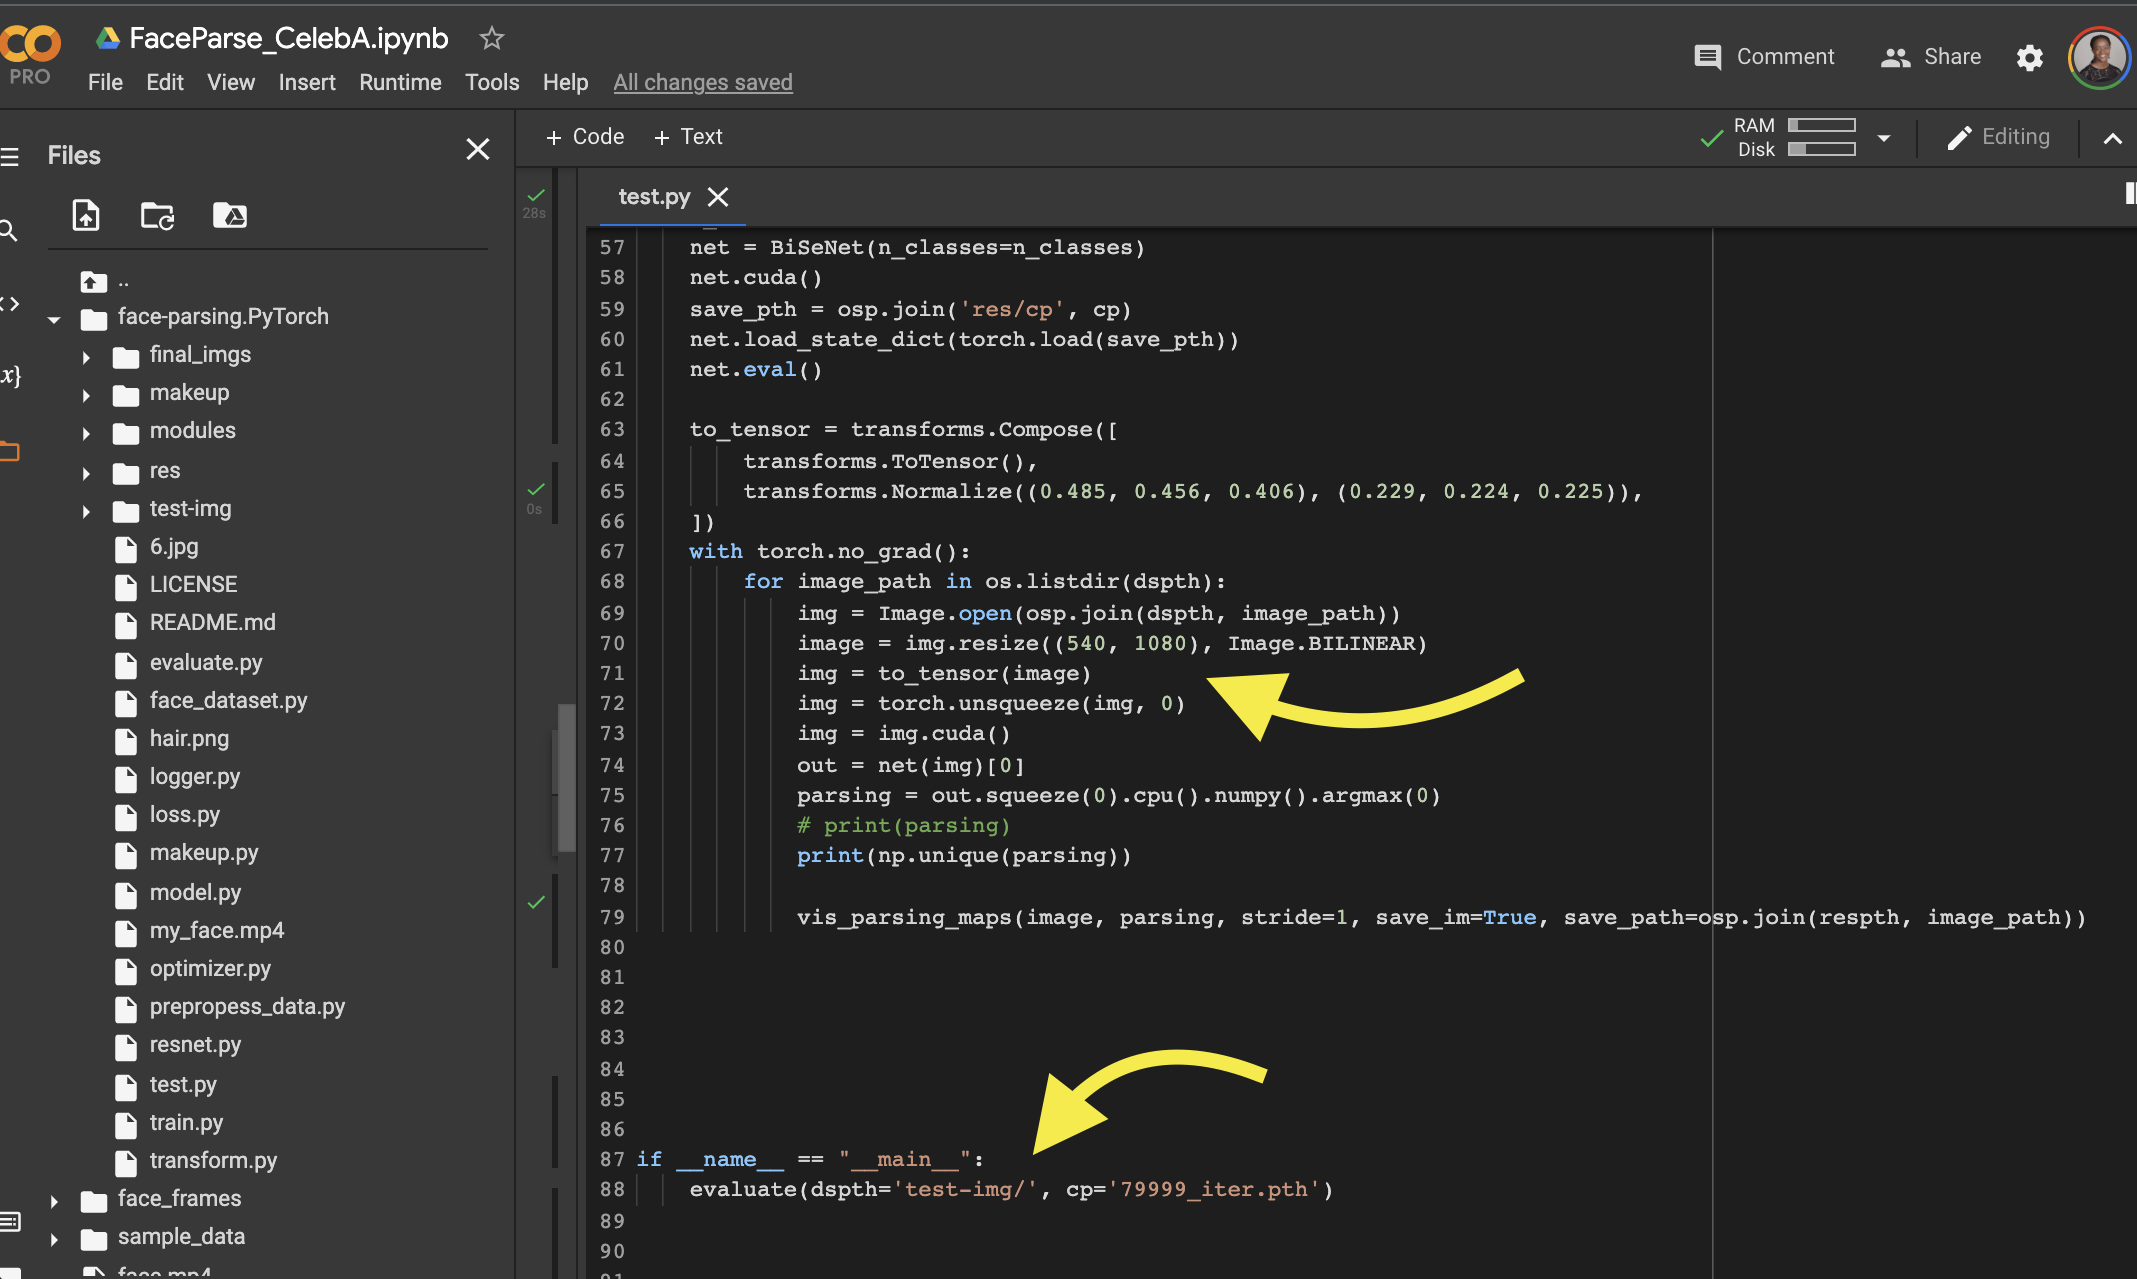

In [ ]:
# run the model on all the extracted imgs
!python3 test.py

Prepare the video

In [ ]:
# concatnate the before and after pictures
# before

In [19]:
# concatnate the before and after pictures
# before
pathIn= 'test-img/'
# I'll use 10 to make the video run faster
fps = 60
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[7:-4]))
print(files)

# after
pathIn2= 'res/test_res/'
# I'll use 10 to make the video run faster
fps = 60
frame_array = []
files2 = [f for f in os.listdir(pathIn) if isfile(join(pathIn2, f))]
#for sorting the file names properly
files2.sort(key = lambda x: x[5:-4])
files2.sort()
frame_array = []
files2 = [f for f in os.listdir(pathIn) if isfile(join(pathIn2, f))]
#for sorting the file names properly
files2.sort(key = lambda x: int(x[7:-4]))
print(files2)

['faceimg0.jpg', 'faceimg1.jpg', 'faceimg2.jpg', 'faceimg3.jpg', 'faceimg4.jpg', 'faceimg5.jpg', 'faceimg6.jpg', 'faceimg7.jpg', 'faceimg8.jpg', 'faceimg9.jpg', 'faceimg10.jpg', 'faceimg11.jpg', 'faceimg12.jpg', 'faceimg13.jpg', 'faceimg14.jpg', 'faceimg15.jpg', 'faceimg16.jpg', 'faceimg17.jpg', 'faceimg18.jpg', 'faceimg19.jpg', 'faceimg20.jpg', 'faceimg21.jpg', 'faceimg22.jpg', 'faceimg23.jpg', 'faceimg24.jpg', 'faceimg25.jpg', 'faceimg26.jpg', 'faceimg27.jpg', 'faceimg28.jpg', 'faceimg29.jpg', 'faceimg30.jpg', 'faceimg31.jpg', 'faceimg32.jpg', 'faceimg33.jpg', 'faceimg34.jpg', 'faceimg35.jpg', 'faceimg36.jpg', 'faceimg37.jpg', 'faceimg38.jpg', 'faceimg39.jpg', 'faceimg40.jpg', 'faceimg41.jpg', 'faceimg42.jpg', 'faceimg43.jpg', 'faceimg44.jpg', 'faceimg45.jpg', 'faceimg46.jpg', 'faceimg47.jpg', 'faceimg48.jpg', 'faceimg49.jpg', 'faceimg50.jpg', 'faceimg51.jpg', 'faceimg52.jpg', 'faceimg53.jpg', 'faceimg54.jpg', 'faceimg55.jpg', 'faceimg56.jpg', 'faceimg57.jpg', 'faceimg58.jpg', 'facei

In [24]:
!pwd

/content/face-parsing.PyTorch


In [25]:
# loop through
out_dir = "final_imgs/"
in_dir1 = "test-img/"
in_dir2 = "res/test_res/"

for i in range(0, len(files)):
  img1 = cv2.imread(in_dir1+files[i])
  img2 = cv2.imread(in_dir2+files2[i])
  im_h = cv2.hconcat([img1, img2])

  cv2.imwrite(out_dir+files[i], im_h)

In [26]:
from os.path import isfile, join
pathIn= 'final_imgs/'
pathOut = 'my_face.mp4'

# I'll use 10 to make the video run faster
fps = 60
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[7:-4]))
print(files)

['faceimg0.jpg', 'faceimg1.jpg', 'faceimg2.jpg', 'faceimg3.jpg', 'faceimg4.jpg', 'faceimg5.jpg', 'faceimg6.jpg', 'faceimg7.jpg', 'faceimg8.jpg', 'faceimg9.jpg', 'faceimg10.jpg', 'faceimg11.jpg', 'faceimg12.jpg', 'faceimg13.jpg', 'faceimg14.jpg', 'faceimg15.jpg', 'faceimg16.jpg', 'faceimg17.jpg', 'faceimg18.jpg', 'faceimg19.jpg', 'faceimg20.jpg', 'faceimg21.jpg', 'faceimg22.jpg', 'faceimg23.jpg', 'faceimg24.jpg', 'faceimg25.jpg', 'faceimg26.jpg', 'faceimg27.jpg', 'faceimg28.jpg', 'faceimg29.jpg', 'faceimg30.jpg', 'faceimg31.jpg', 'faceimg32.jpg', 'faceimg33.jpg', 'faceimg34.jpg', 'faceimg35.jpg', 'faceimg36.jpg', 'faceimg37.jpg', 'faceimg38.jpg', 'faceimg39.jpg', 'faceimg40.jpg', 'faceimg41.jpg', 'faceimg42.jpg', 'faceimg43.jpg', 'faceimg44.jpg', 'faceimg45.jpg', 'faceimg46.jpg', 'faceimg47.jpg', 'faceimg48.jpg', 'faceimg49.jpg', 'faceimg50.jpg', 'faceimg51.jpg', 'faceimg52.jpg', 'faceimg53.jpg', 'faceimg54.jpg', 'faceimg55.jpg', 'faceimg56.jpg', 'faceimg57.jpg', 'faceimg58.jpg', 'facei

In [27]:
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [ ]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    print(i)
    out.write(frame_array[i])
out.release()

Refresh the files tab and the video (my_face.mp4) will appear